<a href="https://colab.research.google.com/github/lililibin2022/TransferLearning/blob/main/YOLOv8-classify-fermenterwindowdashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to Train YOLOv8 Object Detection on a Custom Dataset

In [1]:
!nvidia-smi

Fri Jan 19 07:38:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 5.6 MB/s eta 0:00:00


## Install YOLOv8

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 508, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

## Train YOLOv8 Model on Custom Dataset

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="KambJHvvNRVwsQ1xhopi")
project = rf.workspace("fafu").project("fermenter-window-dashboard")
dataset = project.version(1).download("folder")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fermenter-window-dashboard-1 in folder:: 100%|██████████| 257/257 [00:00<00:00, 5586.26it/s]


In [5]:


# Load a model
model = YOLO('yolov8m-cls.yaml')  # build a new model from YAML
model = YOLO('yolov8m-cls.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8m-cls.yaml').load('yolov8m-cls.pt')  # build from YAML and transfer weights

# Train the model
model = YOLO("yolov8l-cls.pt")

model.train(data="/content/fermenter-window-dashboard-1", epochs=300)


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   2655744  ultralytics.nn.modules.conv.Conv             [384

100%|██████████| 32.7M/32.7M [00:00<00:00, 254MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   2655744  ultralytics.nn.modules.conv.Conv             [384

100%|██████████| 5.30M/5.30M [00:00<00:00, 79.8MB/s]


Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/fermenter-window-dashboard-1, epochs=300, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

100%|██████████| 6.23M/6.23M [00:00<00:00, 123MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/fermenter-window-dashboard-1/train... 189 images, 0 corrupt: 100%|██████████| 189/189 [00:00<00:00, 4498.95it/s]

train: New cache created: /content/fermenter-window-dashboard-1/train.cache



val: Scanning /content/fermenter-window-dashboard-1/test... 18 images, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 2567.68it/s]

val: New cache created: /content/fermenter-window-dashboard-1/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
300 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/300     0.539G      1.111         16        224:  75%|███████▌  | 9/12 [00:02<00:00,  5.62it/s]

      1/300     0.539G      1.097         13        224: 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]
               classes   top1_acc   top5_acc:   0%|          | 0/1 [00:00<?, ?it/s]
100%|██████████| 755k/755k [00:00<00:00, 19.9MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


      2/300     0.386G       0.76         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.32it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      3/300     0.386G     0.4359         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 58.08it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      4/300     0.386G     0.2322         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 46.16it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      5/300     0.386G     0.1125         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.64it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      6/300     0.386G    0.07794         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.67it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      7/300     0.386G    0.04435         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.96it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      8/300     0.386G    0.03962         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.50it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      9/300     0.386G    0.02606         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.01it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     10/300     0.386G     0.0441         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.04it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     11/300     0.386G    0.02597         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 44.89it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     12/300     0.386G    0.02479         13        224: 100%|██████████| 12/12 [00:01<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.68it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     13/300     0.386G    0.03674         13        224: 100%|██████████| 12/12 [00:04<00:00,  2.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 58.03it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     14/300     0.386G    0.02233         13        224: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.53it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     15/300     0.386G    0.08217         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 43.85it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     16/300     0.386G    0.01291         13        224: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.22it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     17/300     0.386G    0.05228         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.61it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     18/300     0.386G    0.01184         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.72it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     19/300     0.386G    0.02987         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.66it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     20/300     0.386G    0.01416         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 51.52it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     21/300     0.386G    0.02623         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.90it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     22/300     0.386G    0.03126         13        224: 100%|██████████| 12/12 [00:03<00:00,  3.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.46it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     23/300     0.386G    0.01379         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.75it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     24/300     0.386G    0.01796         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 43.94it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     25/300     0.386G    0.02965         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.87it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     26/300     0.386G    0.01717         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 46.20it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     27/300     0.386G    0.02729         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.99it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     28/300     0.386G   0.004779         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.29it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     29/300     0.386G    0.01247         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.13it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     30/300     0.386G    0.01122         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.55it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     31/300     0.386G    0.01379         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.74it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     32/300     0.386G    0.00933         13        224: 100%|██████████| 12/12 [00:03<00:00,  3.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.45it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     33/300     0.386G    0.01371         13        224: 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.33it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     34/300     0.386G    0.01627         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.11it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     35/300     0.386G    0.01222         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.49it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     36/300     0.386G   0.003693         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 43.52it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     37/300     0.386G   0.007609         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.64it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     38/300     0.386G   0.008155         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 44.82it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     39/300     0.386G   0.004107         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.27it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     40/300     0.386G   0.001537         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.43it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     41/300     0.386G    0.01235         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.82it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     42/300     0.386G   0.005017         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.09it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     43/300     0.386G    0.01158         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.53it/s]


                   all      0.944          1

      Epoch    GPU_mem       loss  Instances       Size


     44/300     0.386G  0.0007538         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.01it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     45/300     0.386G   0.001793         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.72it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     46/300     0.386G   0.002632         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.70it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     47/300     0.386G   0.001566         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.13it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     48/300     0.386G   0.007462         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 89.95it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     49/300     0.386G    0.01138         13        224: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.52it/s]


                   all      0.944          1

      Epoch    GPU_mem       loss  Instances       Size


     50/300     0.386G   0.008477         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.24it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     51/300     0.386G   0.007823         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 93.57it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     52/300     0.386G     0.0131         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.45it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     53/300     0.386G    0.01394         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.25it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     54/300     0.386G    0.01234         13        224: 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.77it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     55/300     0.386G     0.0176         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.31it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     56/300     0.386G   0.003278         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.75it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     57/300     0.386G   0.002625         13        224: 100%|██████████| 12/12 [00:01<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.06it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     58/300     0.386G   0.001178         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.02it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     59/300     0.386G    0.01327         13        224: 100%|██████████| 12/12 [00:01<00:00,  6.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.68it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     60/300     0.386G    0.00541         13        224: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.06it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


     61/300     0.386G   0.005234         13        224: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.56it/s]

                   all      0.889          1
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 11, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



61 epochs completed in 0.048 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/fermenter-window-dashboard-1/train... found 189 images in 3 classes ✅ 
val: None...
test: /content/fermenter-window-dashboard-1/test... found 18 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.51it/s]


                   all          1          1
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e1f3c1aaef0>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.06739298502604167, 'inference': 1.1615753173828125, 'loss': 0.0007285012139214409, 'postprocess': 0.0006887647840711805}
task: 'classify'
top1: 1.0
top5: 1.0

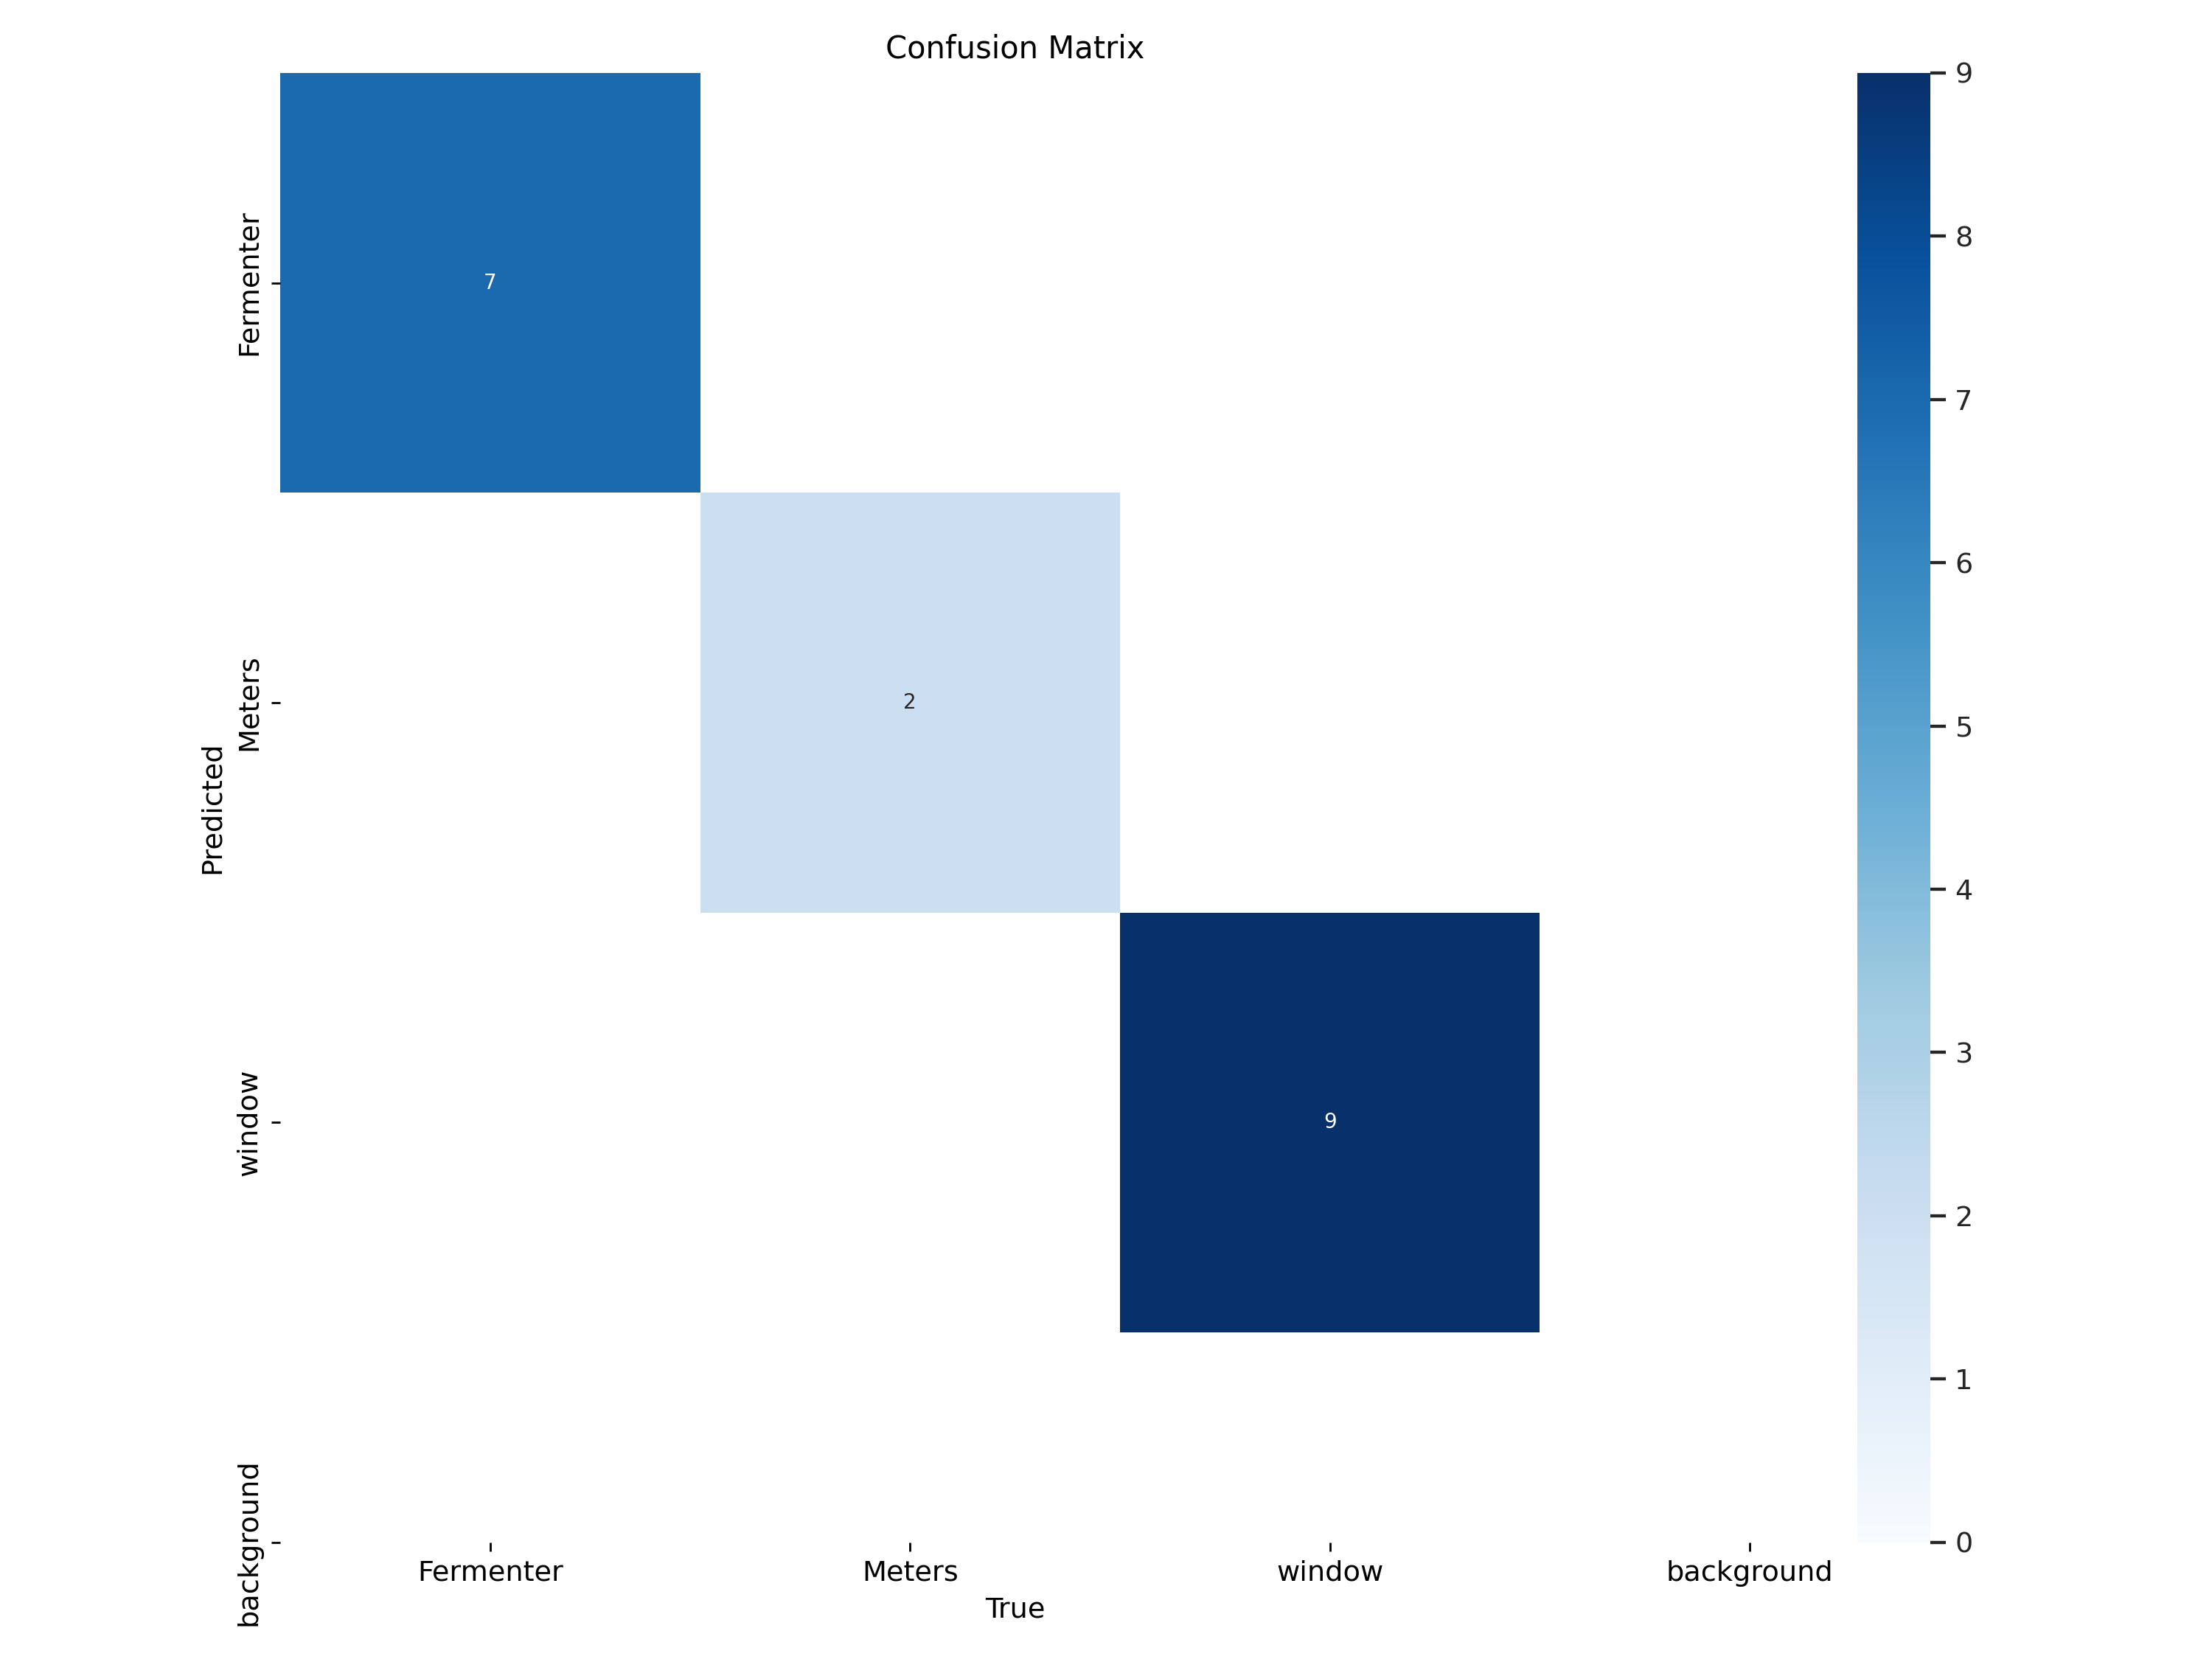

In [20]:
Image(filename=f'/content/runs/classify/train/confusion_matrix.png', width=600)

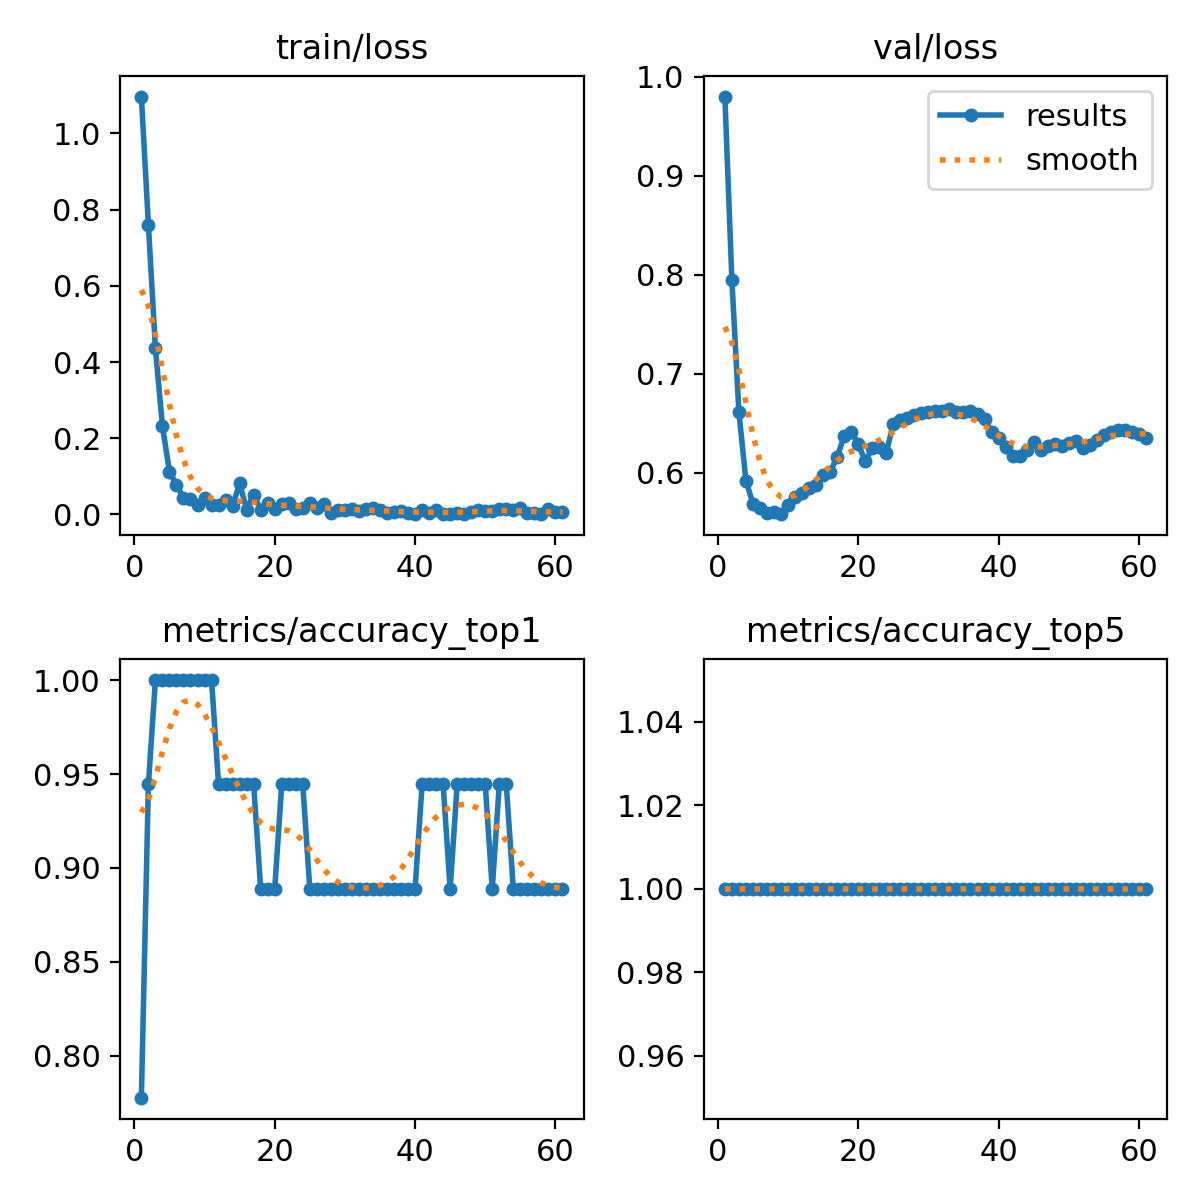

In [21]:
Image(filename=f'/content/runs/classify/train/results.png', width=600)

In [22]:
!yolo task=detect mode=val model=/content/runs/classify/train/weights/best.pt data={dataset.location}

WARNING ⚠️ conflicting 'task=detect' passed with 'task=classify' model. Ignoring 'task=detect' and updating to 'task=classify' to match model.
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/fermenter-window-dashboard-1/train... found 189 images in 3 classes ✅ 
val: None...
test: /content/fermenter-window-dashboard-1/test... found 18 images in 3 classes ✅ 
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 567, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 308, in val
    validator(model=self.model)
  File "/usr/local/lib/pyth

In [28]:
!yolo task=detect mode=predict model=/content/runs/classify/train/weights/best.pt conf=0.5 source={dataset.location}/test/window save_txt=true save_conf=true

WARNING ⚠️ conflicting 'task=detect' passed with 'task=classify' model. Ignoring 'task=detect' and updating to 'task=classify' to match model.
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs

image 1/9 /content/fermenter-window-dashboard-1/test/window/Day2-FerWin-5-_JPG.rf.4ed8bddfd10edf42e69187f86082b556.jpg: 224x224 window 1.00, Meters 0.00, Fermenter 0.00, 3.8ms
image 2/9 /content/fermenter-window-dashboard-1/test/window/Day3-FerWin-17-_JPG.rf.71a4455fe0773949fb45d7af98228c4b.jpg: 224x224 window 1.00, Fermenter 0.00, Meters 0.00, 4.0ms
image 3/9 /content/fermenter-window-dashboard-1/test/window/Day3-FerWin-2-_JPG.rf.433c5351fd39888cb1b388abdab21036.jpg: 224x224 window 1.00, Fermenter 0.00, Meters 0.00, 4.0ms
image 4/9 /content/fermenter-window-dashboard-1/test/window/Day3-FerWin-6-_JPG.rf.85cf1f381d5f7c85f93e975f7de54c4b.jpg: 224x224 window 1.00, Fermenter 0.00, 

In [7]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [31]:
import shutil
import os

source_directory = '/content/runs/classify'
destination_directory = '/content/gdrive/MyDrive/Fermenterclassify240119/train'  # Use the existing directory as the parent

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Copy the contents of the source directory into the destination directory
for item in os.listdir(source_directory):
    source_item = os.path.join(source_directory, item)
    destination_item = os.path.join(destination_directory, item)
    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item)
    else:
        shutil.copy2(source_item, destination_item)